##Importando Bibliotecas e Banco de dados

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Definir as ações
ticker1 = "LEVE3.SA"
dolar = "USDBRL=X"

# Definir as datas inicial e final
data_inicial = "2017-01-01"
data_final = "2022-12-31"

# Baixar os dados históricos
dados_leve = yf.download(ticker1, data_inicial, data_final)
cotacao_dolar = yf.download(dolar, data_inicial, data_final)

In [ ]:
# Visualizar os dados
dados_leve

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,20.790001,20.790001,20.490000,20.610001,12.983636,29500
2017-01-03,20.750000,21.730000,20.320000,21.730000,13.689198,145400
2017-01-04,21.730000,23.100000,21.540001,22.900000,14.426261,356000
2017-01-05,22.850000,23.250000,22.850000,23.250000,14.646749,298900
2017-01-06,23.219999,23.360001,22.799999,22.799999,14.363264,215400
...,...,...,...,...,...,...
2022-12-23,29.180000,30.500000,28.860001,30.180000,27.639412,195000
2022-12-26,30.370001,31.030001,29.950001,30.680000,28.097322,155700
2022-12-27,31.010000,31.010000,30.120001,30.410000,27.850050,142200


##Normalização do Banco de dados e Preparação para treino

In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalizar os dados
#for coluna in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
    dados_leve[coluna] = (dados_leve[coluna] - dados_leve[coluna].min()) / (dados_leve[coluna].max() - dados_leve[coluna].min())
    cotacao_dolar[coluna] = (cotacao_dolar[coluna] - cotacao_dolar[coluna].min()) / (cotacao_dolar[coluna].max() - cotacao_dolar[coluna].min())

In [ ]:
dados_leve

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.211111,0.194396,0.222061,0.202523,0.097139,0.015492
2017-01-03,0.209677,0.227320,0.215893,0.241766,0.126865,0.076358
2017-01-04,0.244803,0.275306,0.260160,0.282761,0.157918,0.186955
2017-01-05,0.284946,0.280560,0.307692,0.295025,0.167207,0.156969
2017-01-06,0.298208,0.284413,0.305878,0.279257,0.155264,0.113118
...,...,...,...,...,...,...
2022-12-23,0.511828,0.534501,0.525762,0.537842,0.714593,0.102405
2022-12-26,0.554480,0.553065,0.565312,0.555361,0.733885,0.081767
2022-12-27,0.577419,0.552364,0.571480,0.545901,0.723467,0.074677


In [ ]:
# Criar a nova coluna Movimento 1 dia
dados_leve["Movimento"] = (dados_leve["Close"] > dados_leve["Close"].shift(1)).astype("int")
dados_csna["Movimento"] = (dados_csna["Close"] > dados_csna["Close"].shift(1)).astype("int")
dados_grnd["Movimento"] = (dados_grnd["Close"] > dados_grnd["Close"].shift(1)).astype("int")

In [ ]:
# Criar a nova coluna Movimento 7 dias
dados_leve["Movimento_7"] = dados_leve["Close"].rolling(window=7).mean() > dados_leve["Close"].shift(7)
dados_csna["Movimento_7"] = dados_csna["Close"].rolling(window=7).mean() > dados_csna["Close"].shift(7)
dados_grnd["Movimento_7"] = dados_grnd["Close"].rolling(window=7).mean() > dados_grnd["Close"].shift(7)

In [ ]:
# Converter os valores True e False para 0 e 1
dados_leve["Movimento_7"] = (dados_leve["Movimento_7"] == True).astype(int)
dados_csna["Movimento_7"] = (dados_csna["Movimento_7"] == True).astype(int)
dados_grnd["Movimento_7"] = (dados_grnd["Movimento_7"] == True).astype(int)

In [ ]:
dados_leve.head(10)

In [ ]:
leve = pd.merge(dados_leve, cotacao_dolar, on="Date")

In [ ]:
dados_leve.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [ ]:
dados_leve

,Close
Date,
2017-01-02,20.610001
2017-01-03,21.730000
2017-01-04,22.900000
2017-01-05,23.250000
2017-01-06,22.799999
...,...
2022-12-23,30.180000
2022-12-26,30.680000
2022-12-27,30.410000


In [ ]:
qtd_linhas = len(dados_leve)
qtd_linhas

1493

In [ ]:
qtd_linhas_treino = round(0.7 * qtd_linhas)
qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste}"
)
info

'linhas treino= 0:1045 linhas teste= 1045:1493'

In [ ]:
# Criar um objeto StandardScaler e Normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dados_leve)

In [ ]:
#Separa em treino e teste
train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino: qtd_linhas_treino+qtd_linhas_teste]

print (len(train), len(test))

1045 448


In [ ]:
def create_df (leve, steps=1):
  dataX, dataY = [], []
  for i in range(len(leve)-steps-1):
    a = leve[i:(i+steps), 0]
    dataX.append(a)
    dataY.append(leve[i + steps, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#gerando dados de treino e teste
steps = 15
X_train, Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1029, 15)
(1029,)
(432, 15)
(432,)


## Montando o modelo LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Montando o modelo
model = Sequential()
model.add(LSTM(35, return_sequences=True, input_shape=(steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 35)            5180      
                                                                 
 lstm_1 (LSTM)               (None, 15, 35)            9940      
                                                                 
 lstm_2 (LSTM)               (None, 35)                9940      
                                                                 
 dropout (Dropout)           (None, 35)                0         
                                                                 
 dense (Dense)               (None, 1)                 36        
                                                                 
Total params: 25096 (98.03 KB)
Trainable params: 25096 (98.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
validation = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, batch_size=15, verbose=2)

Epoch 1/300
69/69 - 10s - loss: 0.1181 - val_loss: 0.4217 - 10s/epoch - 139ms/step
Epoch 2/300
69/69 - 2s - loss: 0.0652 - val_loss: 0.2080 - 2s/epoch - 22ms/step
Epoch 3/300
69/69 - 2s - loss: 0.0463 - val_loss: 0.1666 - 2s/epoch - 22ms/step
Epoch 4/300
69/69 - 2s - loss: 0.0413 - val_loss: 0.2256 - 2s/epoch - 30ms/step
Epoch 5/300
69/69 - 2s - loss: 0.0370 - val_loss: 0.2273 - 2s/epoch - 25ms/step
Epoch 6/300
69/69 - 2s - loss: 0.0349 - val_loss: 0.1262 - 2s/epoch - 35ms/step
Epoch 7/300
69/69 - 2s - loss: 0.0379 - val_loss: 0.1318 - 2s/epoch - 34ms/step
Epoch 8/300
69/69 - 2s - loss: 0.0324 - val_loss: 0.1246 - 2s/epoch - 24ms/step
Epoch 9/300
69/69 - 2s - loss: 0.0296 - val_loss: 0.1186 - 2s/epoch - 22ms/step
Epoch 10/300
69/69 - 2s - loss: 0.0284 - val_loss: 0.1259 - 2s/epoch - 22ms/step
Epoch 11/300
69/69 - 2s - loss: 0.0289 - val_loss: 0.1126 - 2s/epoch - 22ms/step
Epoch 12/300
69/69 - 2s - loss: 0.0259 - val_loss: 0.1178 - 2s/epoch - 23ms/step
Epoch 13/300
69/69 - 2s - loss: 0.

In [ ]:
def accuracy(y_true, y_pred, threshold=0.1):
  """Calcula a acurácia de um modelo para uma variável contínua.

  Args:
    y_true: Os valores reais da variável contínua.
    y_pred: As previsões do modelo para a variável contínua.
    threshold: O limite para definir uma previsão como correta.

  Returns:
    A acurácia do modelo.
  """

  errors = np.abs(y_pred - y_true)
  correct_predictions = np.count_nonzero(errors <= threshold)
  total_predictions = len(y_pred)
  accuracy = correct_predictions / total_predictions
  return accuracy

def recall(y_true, y_pred, threshold=0.1):
  """Calcula o recall de um modelo para uma variável contínua.

  Args:
    y_true: Os valores reais da variável contínua.
    y_pred: As previsões do modelo para a variável contínua.
    threshold: O limite para definir uma previsão como positiva.

  Returns:
    O recall do modelo.
  """

  positive_examples = np.count_nonzero(y_true > threshold)
  true_positives = np.count_nonzero((y_true > threshold) & (y_pred > threshold))
  recall = true_positives / positive_examples
  return recall

# Calcular a acurácia e recall do modelo
accuracy = accuracy(Y_test, y_pred)
recall = recall(Y_test, y_pred)

# Imprimir os resultados
print("Acurácia:", accuracy)
print("Recall:", recall)

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)

14/14 [==============================] - 1s 7ms/step
MSE: 0.11157336742981759
MAE: 0.20807911112624403
RMSE: 0.33402599813460265
R^2: 0.883357185952399


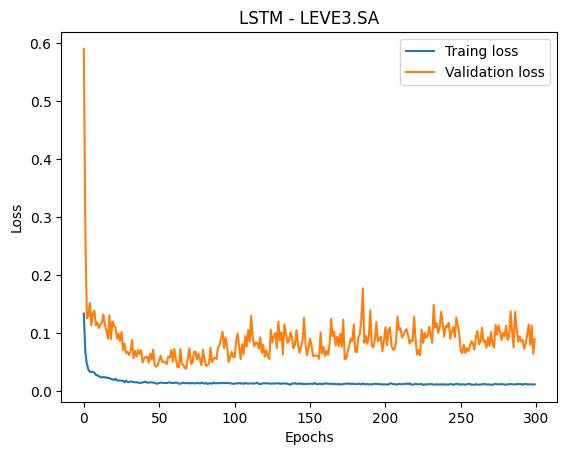

In [ ]:
plt.plot(validation.history['loss'], label='Traing loss')
plt.plot(validation.history['val_loss'], label='Validation loss')
plt.title('LSTM - LEVE3.SA')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Fazer previsões usando o modelo
prev = model.predict(X_test)
prev = scaler.inverse_transform(prev)
prev

14/14 [==============================] - 0s 8ms/step


array([[24.192312],
       [25.37699 ],
       [25.633823],
       [26.207632],
       [26.02376 ],
       [25.989449],
       [26.627235],
       [26.770891],
       [26.44329 ],
       [25.742085],
       [25.7907  ],
       [25.692646],
       [25.359068],
       [27.044739],
       [27.972092],
       [27.661507],
       [26.569555],
       [24.961311],
       [24.560041],
       [24.541826],
       [24.322649],
       [24.317703],
       [23.949135],
       [24.101027],
       [23.570032],
       [23.2605  ],
       [25.74804 ],
       [29.018185],
       [30.18979 ],
       [29.504759],
       [29.738394],
       [29.83593 ],
       [28.504675],
       [28.076353],
       [27.093332],
       [27.397459],
       [27.716492],
       [27.438951],
       [29.383516],
       [30.209421],
       [30.781563],
       [32.52873 ],
       [33.107162],
       [33.491665],
       [34.042854],
       [32.79811 ],
       [33.22865 ],
       [32.910507],
       [33.36826 ],
       [29.82753 ],


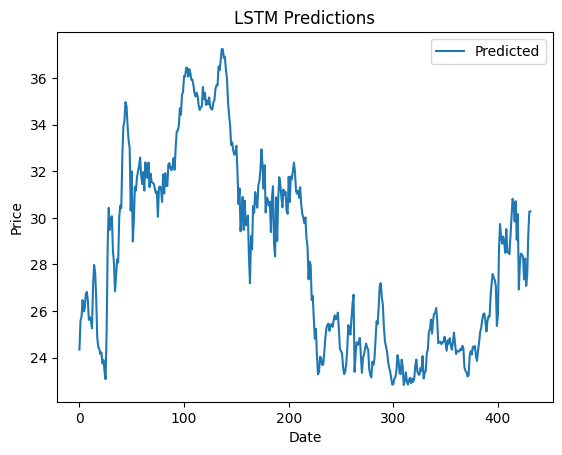

In [ ]:
plt.plot(prev, label='Predicted')
plt.title('LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

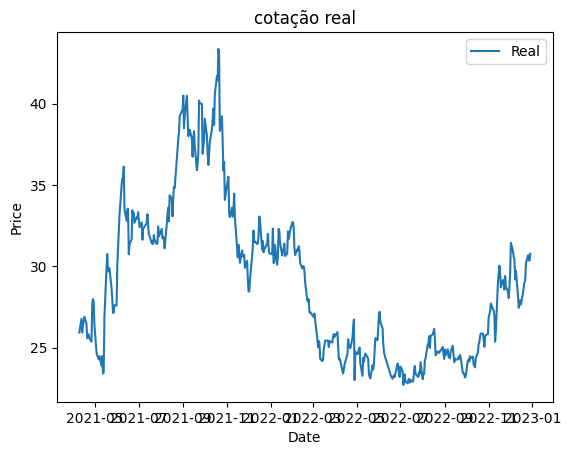

In [ ]:
dados_leve_final = dados_leve['Close'][-432:]
plt.plot(dados_leve_final, label= 'Real')
plt.title('cotação real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

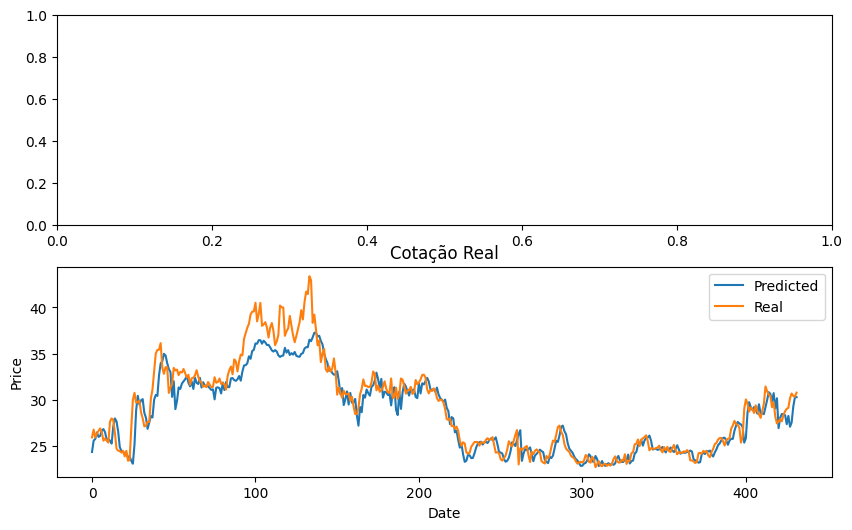

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot dos valores previstos
plt.plot(prev, label='Predicted')
plt.legend()

# Plot dos valores reais
plt.plot(dados_leve_final, label='Real')
plt.title('Cotação Real x Predição')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()